## <span style="color:blue">  Laboratorio di Simulazione Numerica - Esercitazione 04</span>

Il codice di **Dinamica Molecolare/Monte Carlo** (**MD_MC**) che ci è stato fornito calcola l'energia totale (interna) per particella $E/N$, l'energia potenziale per particella $U/N$, l'energia cinetica per particella $K/N$ e la temperatura $T$.

Per prima cosa ho incluso il calcolo della pressione $P$ all'interno di questo codice, ricordando che, per mezzo del **Teorema del Viriale**, la pressione in un sistema di Lennard-Jones può essere stimata per mezzo di:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

Nelle simulazioni è spesso conveniente esprimere le quantità in **unità ridotte**, denotate con l'apice $^*$. In un sistema di Lennard-Jones una scelta naturale è prendere come unità di lunghezza $\sigma$ (distanza caratteristica), come unità di energia $\epsilon$ (energia caratteristica) e come unità di massa $m$ (massa caratteristica). Da queste unità di base seguono tutte le altre unità; per esempio, la densità viene indicata con $\rho^* = \rho \sigma^3$ , la pressione con $P^* = \frac{P \sigma^3}{\epsilon}$, la temperatura con $T^* = \frac{K_B T}{\epsilon}$ e il volume con $V^* = \frac{V}{\sigma^3}$.

E' quindi possibile esprimere la pressione $P^*$ in un sistema di Lennard-Jones in unità ridotte per mezzo di:

$$ P^* = \rho^* T^* + \frac{16}{V^*}  \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N  \left[ \left(\frac{1}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{1}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

La ragione più importante per introdurre le unità ridotte è che molte combinazioni di $\rho$, $T$, $\epsilon$ e $\sigma$ corrispondono allo stesso stato in unità ridotte: questa è la **Legge degli Stati Corrispondenti.**

Utilizzando poi questo codice ho eseguito delle simulazioni MD per un modello di Lennard-Jones dell'Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) nelle seguenti condizioni:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import scipy.stats

/home/andrea/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


1. **fase solida**: $\rho^\star = 1.1$, $T_{start}^{\star} = 1.55$, $T_{target}^{\star} = 0.8$ (cut-off radius: $r_c = 2.2$)

In [2]:
eq_solid = np.loadtxt("Esercizio_04_2/Solid_Phase/nsl_simulator/NSL_SIMULATOR/OUTPUT/equilibration.dat", skiprows=1)

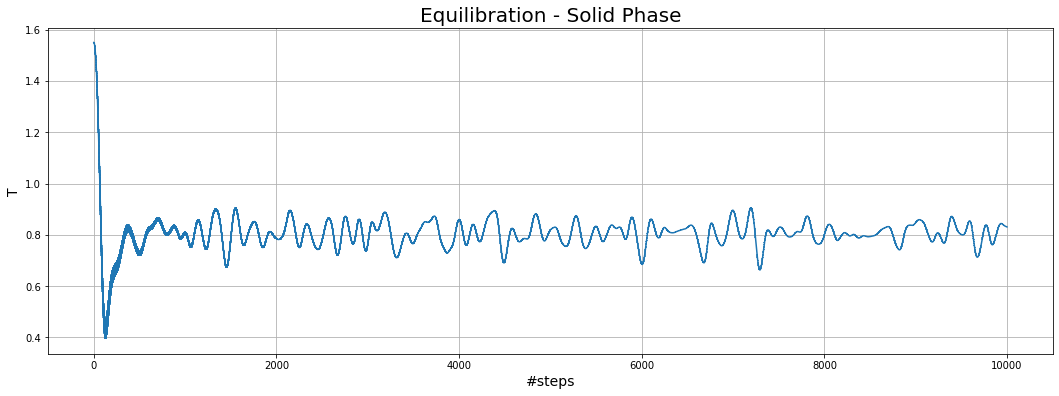

In [3]:
N=10000        # Numero di blocchi
L=1            # Numero di step in ogni blocco
x = np.arange(N)      # [0,1,2,...,N-1]

x*=L # Numero di step = blocco * (Numero di step in ogni blocco)
plt.figure(figsize=(18, 6))
plt.errorbar(x,eq_solid[:, 1],yerr=eq_solid[:, -1])
plt.xlabel('#steps', fontsize=14)
plt.ylabel('T', fontsize=14)
plt.title('Equilibration - Solid Phase', fontsize=20)
plt.grid(True)
plt.show()

*Per mettere in evidenza come l'energia totale sia conservata dall'algoritmo, ho deciso di mostrare quel particolare grafico utilizzando una scala analoga a quella dell'energia cinetica e potenziale.*

In [4]:
total_solid = np.loadtxt("Esercizio_04_2/Solid_Phase/nsl_simulator/NSL_SIMULATOR/OUTPUT/total_energy.dat", skiprows=1)

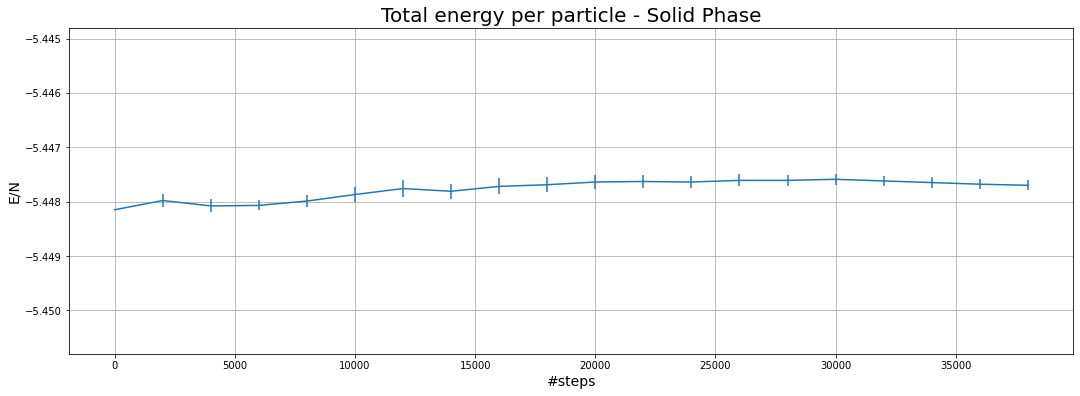

In [5]:
N=20        # Numero di blocchi
L=2000            # Numero di step in ogni blocco
x = np.arange(N)      # [0,1,2,...,N-1]

x*=L # Numero di step = blocco * (Numero di step in ogni blocco)
plt.figure(figsize=(18, 6))
plt.errorbar(x,total_solid[:, 2],yerr=total_solid[:, -1])
plt.xlabel('#steps', fontsize=14)
plt.ylabel('E/N', fontsize=14)
plt.title('Total energy per particle - Solid Phase', fontsize=20)
plt.ylim(-5.4508, -5.4448)
plt.grid(True)
plt.show()

In [6]:
potential_solid = np.loadtxt("Esercizio_04_2/Solid_Phase/nsl_simulator/NSL_SIMULATOR/OUTPUT/potential_energy.dat", skiprows=1)

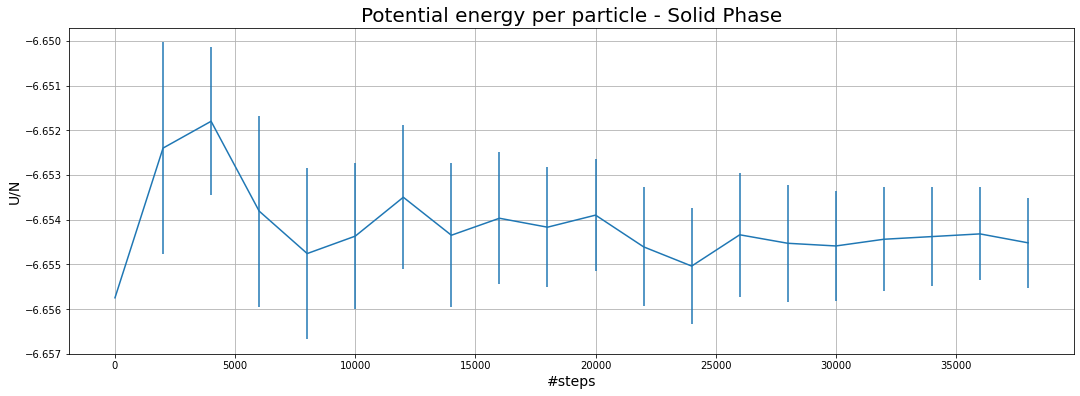

In [7]:
plt.figure(figsize=(18, 6))
plt.errorbar(x,potential_solid[:, 2],yerr=potential_solid[:, -1])
plt.xlabel('#steps', fontsize=14)
plt.ylabel('U/N', fontsize=14)
plt.title('Potential energy per particle - Solid Phase', fontsize=20)
plt.grid(True)
plt.show()

In [8]:
kinetic_solid = np.loadtxt("Esercizio_04_2/Solid_Phase/nsl_simulator/NSL_SIMULATOR/OUTPUT/kinetic_energy.dat", skiprows=1)

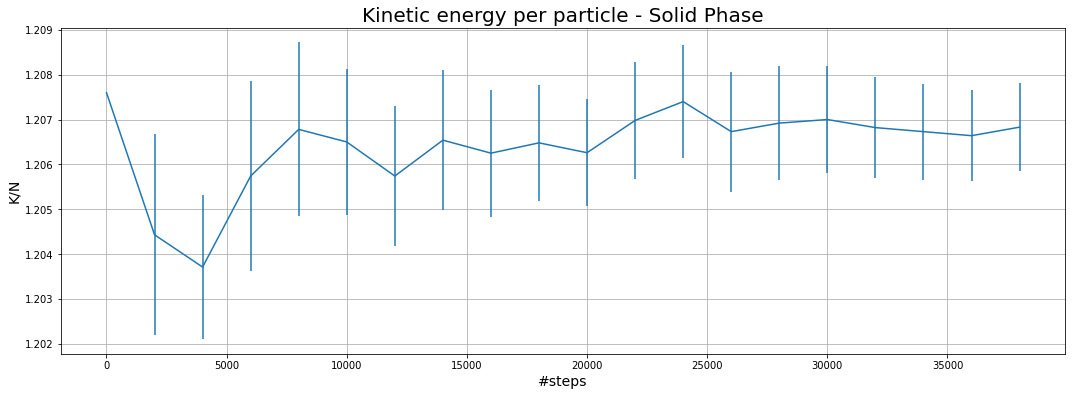

In [9]:
plt.figure(figsize=(18, 6))
plt.errorbar(x,kinetic_solid[:, 2],yerr=kinetic_solid[:, -1])
plt.xlabel('#steps', fontsize=14)
plt.ylabel('K/N', fontsize=14)
plt.title('Kinetic energy per particle - Solid Phase', fontsize=20)
plt.grid(True)
plt.show()

In [10]:
temp_solid = np.loadtxt("Esercizio_04_2/Solid_Phase/nsl_simulator/NSL_SIMULATOR/OUTPUT/temperature.dat", skiprows=1)

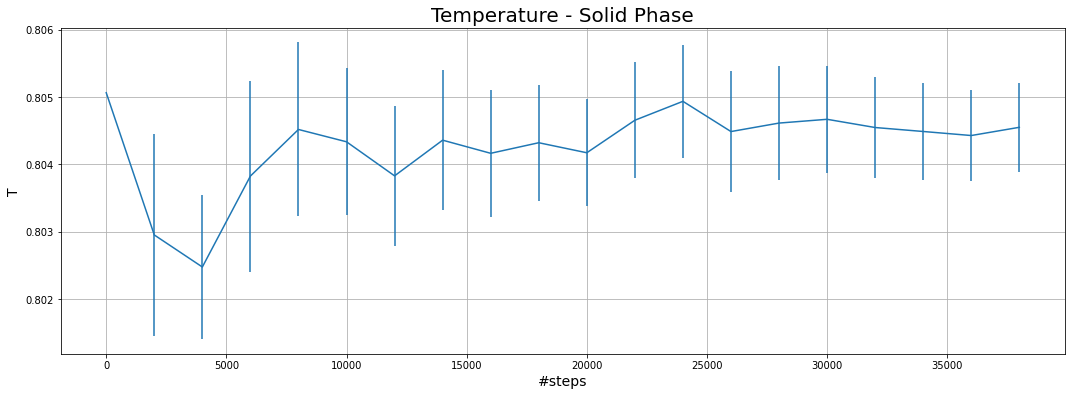

In [11]:
plt.figure(figsize=(18, 6))
plt.errorbar(x,temp_solid[:, 2],yerr=temp_solid[:, -1])
plt.xlabel('#steps', fontsize=14)
plt.ylabel('T', fontsize=14)
plt.title('Temperature - Solid Phase', fontsize=20)
plt.grid(True)
plt.show()

In [12]:
press_solid = np.loadtxt("Esercizio_04_2/Solid_Phase/nsl_simulator/NSL_SIMULATOR/OUTPUT/pressure.dat", skiprows=1)

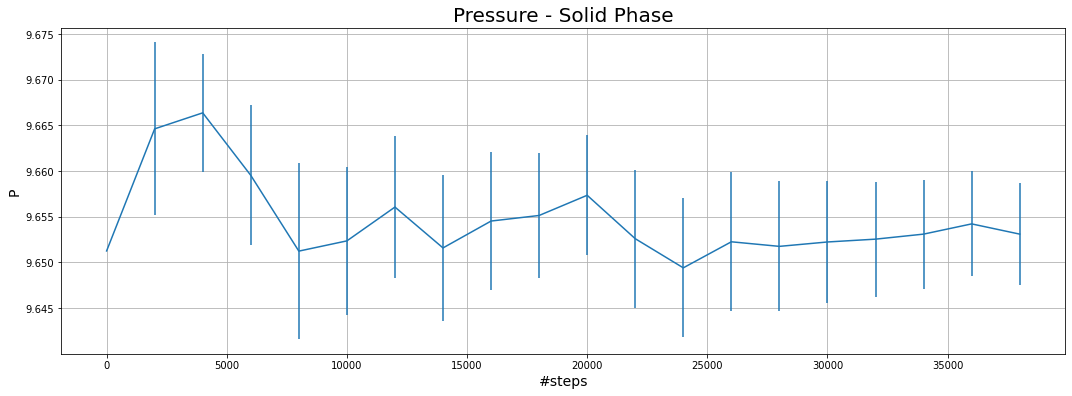

In [13]:
plt.figure(figsize=(18, 6))
plt.errorbar(x,press_solid[:, 2],yerr=press_solid[:, -1])
plt.xlabel('#steps', fontsize=14)
plt.ylabel('P', fontsize=14)
plt.title('Pressure - Solid Phase', fontsize=20)
plt.grid(True)
plt.show()

2. **fase liquida**: $\rho^\star = 0.8$, $T_{start}^{\star} = 1.96$, $T_{target}^{\star} = 1.1$ (cut-off radius: $r_c = 2.5$)

In [14]:
eq_liquid = np.loadtxt("Esercizio_04_2/Liquid_Phase/nsl_simulator/NSL_SIMULATOR/OUTPUT/equilibration.dat", skiprows=1)

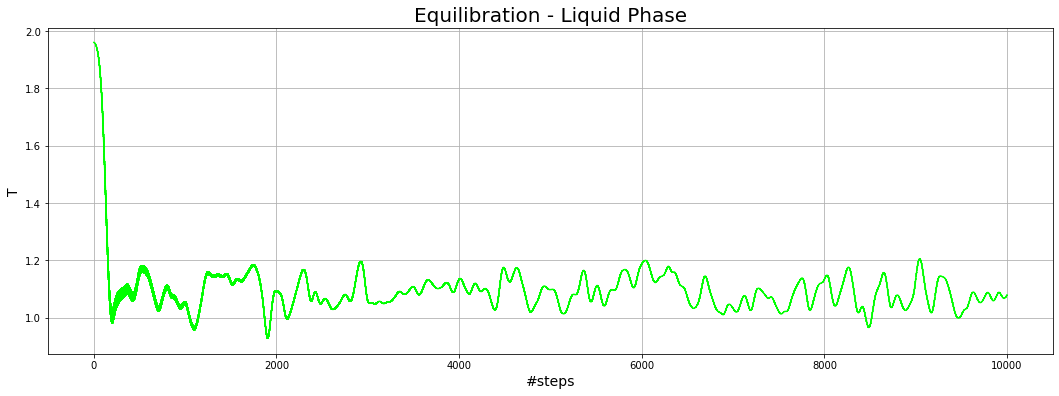

In [15]:
N=10000        # Numero di blocchi
L=1            # Numero di step in ogni blocco
x = np.arange(N)      # [0,1,2,...,N-1]

x*=L # Numero di step = blocco * (Numero di step in ogni blocco)
plt.figure(figsize=(18, 6))
plt.errorbar(x,eq_liquid[:, 1],yerr=eq_liquid[:, -1],color='#00FF00')
plt.xlabel('#steps', fontsize=14)
plt.ylabel('T', fontsize=14)
plt.title('Equilibration - Liquid Phase', fontsize=20)
plt.grid(True)
plt.show()

*Per mettere in evidenza come l'energia totale sia conservata dall'algoritmo, ho deciso di mostrare quel particolare grafico utilizzando una scala analoga a quella dell'energia cinetica e potenziale.*

In [16]:
total_liquid = np.loadtxt("Esercizio_04_2/Liquid_Phase/nsl_simulator/NSL_SIMULATOR/OUTPUT/total_energy.dat", skiprows=1)

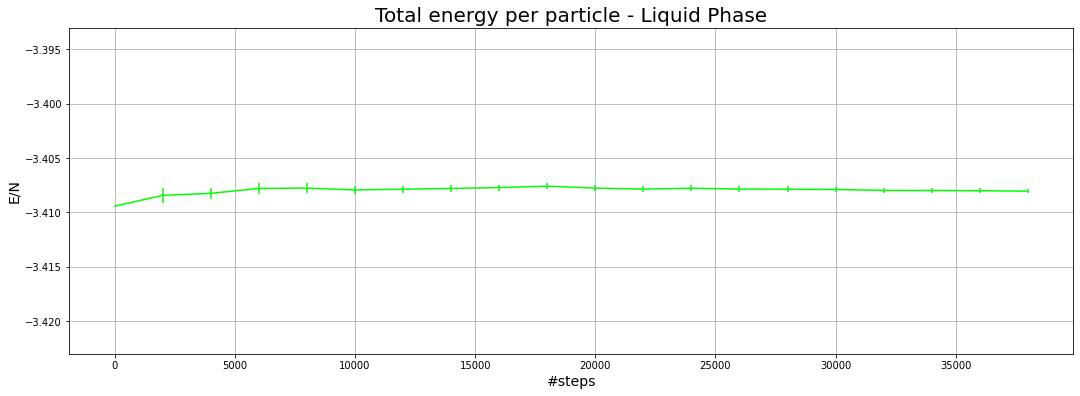

In [17]:
N=20        # Numero di blocchi
L=2000            # Numero di step in ogni blocco
x = np.arange(N)      # [0,1,2,...,N-1]

x*=L # Numero di step = blocco * (Numero di step in ogni blocco)
plt.figure(figsize=(18, 6))
plt.errorbar(x,total_liquid[:, 2],yerr=total_liquid[:, -1],color='#00FF00')
plt.xlabel('#steps', fontsize=14)
plt.ylabel('E/N', fontsize=14)
plt.title('Total energy per particle - Liquid Phase', fontsize=20)
plt.ylim(-3.423, -3.393)
plt.grid(True)
plt.show()

In [18]:
potential_liquid = np.loadtxt("Esercizio_04_2/Liquid_Phase/nsl_simulator/NSL_SIMULATOR/OUTPUT/potential_energy.dat", skiprows=1)

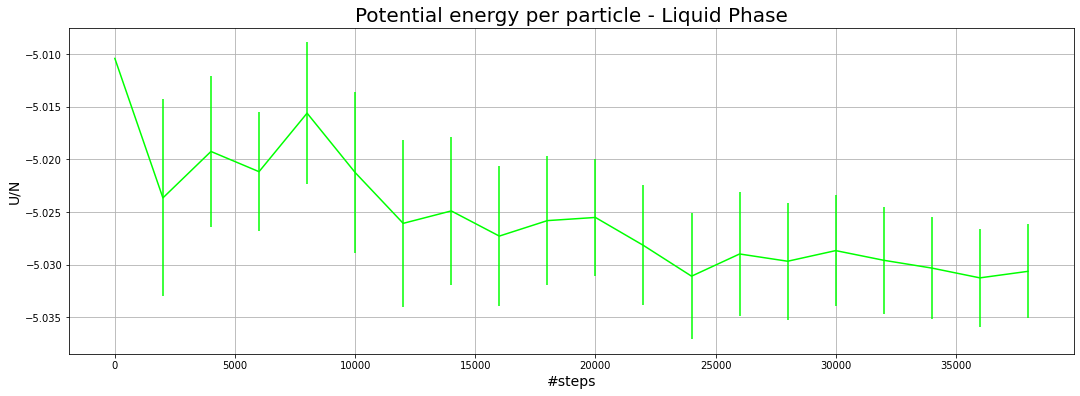

In [19]:
plt.figure(figsize=(18, 6))
plt.errorbar(x,potential_liquid[:, 2],yerr=potential_liquid[:, -1],color='#00FF00')
plt.xlabel('#steps', fontsize=14)
plt.ylabel('U/N', fontsize=14)
plt.title('Potential energy per particle - Liquid Phase', fontsize=20)
plt.grid(True)
plt.show()

In [20]:
kinetic_liquid = np.loadtxt("Esercizio_04_2/Liquid_Phase/nsl_simulator/NSL_SIMULATOR/OUTPUT/kinetic_energy.dat", skiprows=1)

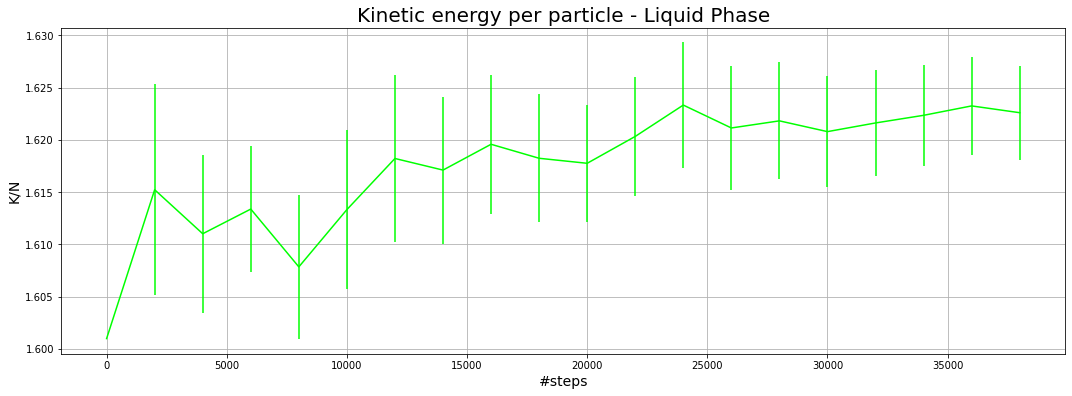

In [21]:
plt.figure(figsize=(18, 6))
plt.errorbar(x,kinetic_liquid[:, 2],yerr=kinetic_liquid[:, -1],color='#00FF00')
plt.xlabel('#steps', fontsize=14)
plt.ylabel('K/N', fontsize=14)
plt.title('Kinetic energy per particle - Liquid Phase', fontsize=20)
plt.grid(True)
plt.show()

In [22]:
temp_liquid = np.loadtxt("Esercizio_04_2/Liquid_Phase/nsl_simulator/NSL_SIMULATOR/OUTPUT/temperature.dat", skiprows=1)

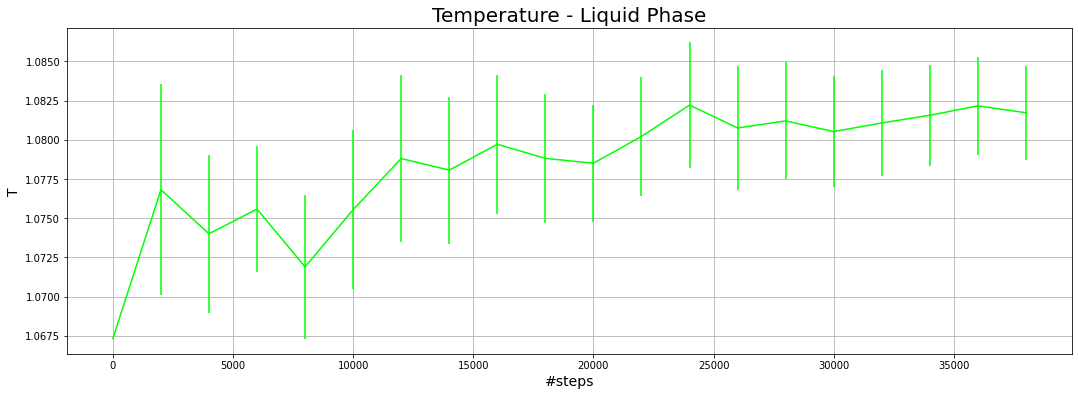

In [23]:
plt.figure(figsize=(18, 6))
plt.errorbar(x,temp_liquid[:, 2],yerr=temp_liquid[:, -1],color='#00FF00')
plt.xlabel('#steps', fontsize=14)
plt.ylabel('T', fontsize=14)
plt.title('Temperature - Liquid Phase', fontsize=20)
plt.grid(True)
plt.show()

In [24]:
press_liquid = np.loadtxt("Esercizio_04_2/Liquid_Phase/nsl_simulator/NSL_SIMULATOR/OUTPUT/pressure.dat", skiprows=1)

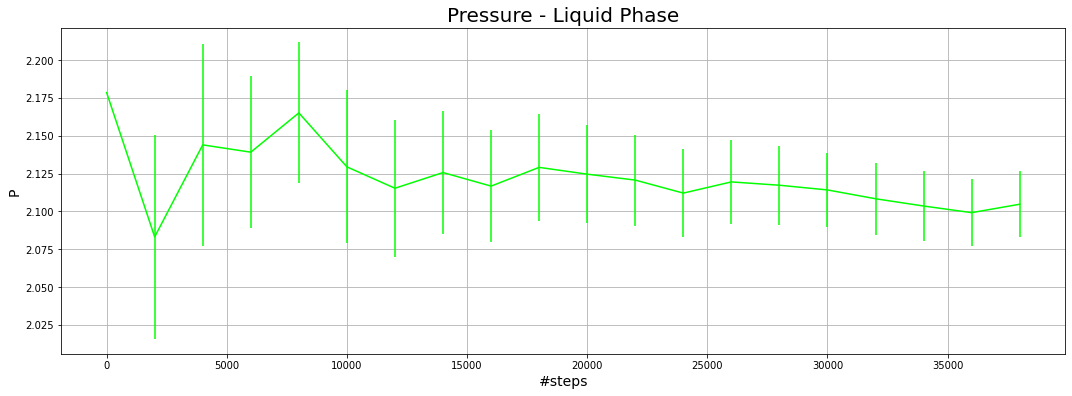

In [25]:
plt.figure(figsize=(18, 6))
plt.errorbar(x,press_liquid[:, 2],yerr=press_liquid[:, -1],color='#00FF00')
plt.xlabel('#steps', fontsize=14)
plt.ylabel('P', fontsize=14)
plt.title('Pressure - Liquid Phase', fontsize=20)
plt.grid(True)
plt.show()

3. **fase gassosa**: $\rho^\star = 0.05$, $T_{start}^{\star} = 0.98$, $T_{target}^{\star} = 1.2$ (cut-off radius: $r_c = 5.0$)

In [26]:
eq_gas = np.loadtxt("Esercizio_04_2/Gas_Phase/nsl_simulator/NSL_SIMULATOR/OUTPUT/equilibration.dat", skiprows=1)

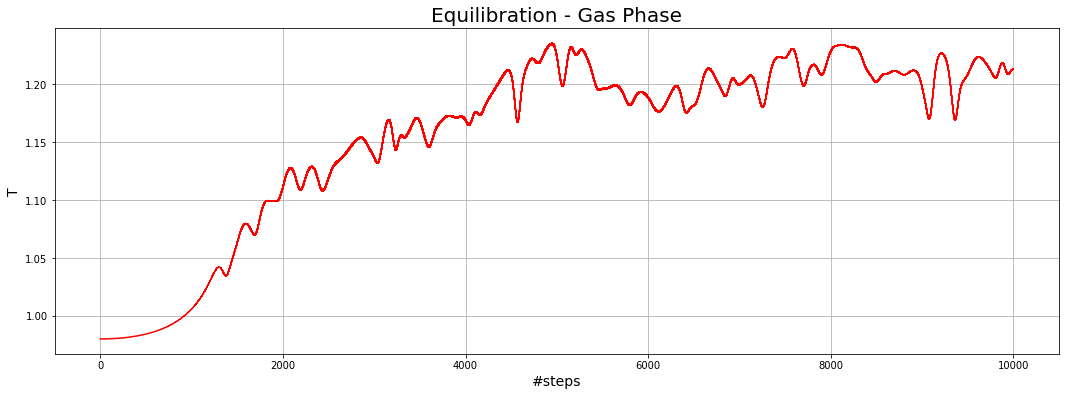

In [27]:
N=10000        # Numero di blocchi
L=1            # Numero di step in ogni blocco
x = np.arange(N)      # [0,1,2,...,N-1]

x*=L # Numero di step = blocco * (Numero di step in ogni blocco)
plt.figure(figsize=(18, 6))
plt.errorbar(x,eq_gas[:, 1],yerr=eq_gas[:, -1],color='red')
plt.xlabel('#steps', fontsize=14)
plt.ylabel('T', fontsize=14)
plt.title('Equilibration - Gas Phase', fontsize=20)
plt.grid(True)
plt.show()

*Per mettere in evidenza come l'energia totale sia conservata dall'algoritmo, ho deciso di mostrare quel particolare grafico utilizzando una scala analoga a quella dell'energia cinetica e potenziale.*

In [28]:
total_gas = np.loadtxt("Esercizio_04_2/Gas_Phase/nsl_simulator/NSL_SIMULATOR/OUTPUT/total_energy.dat", skiprows=1)

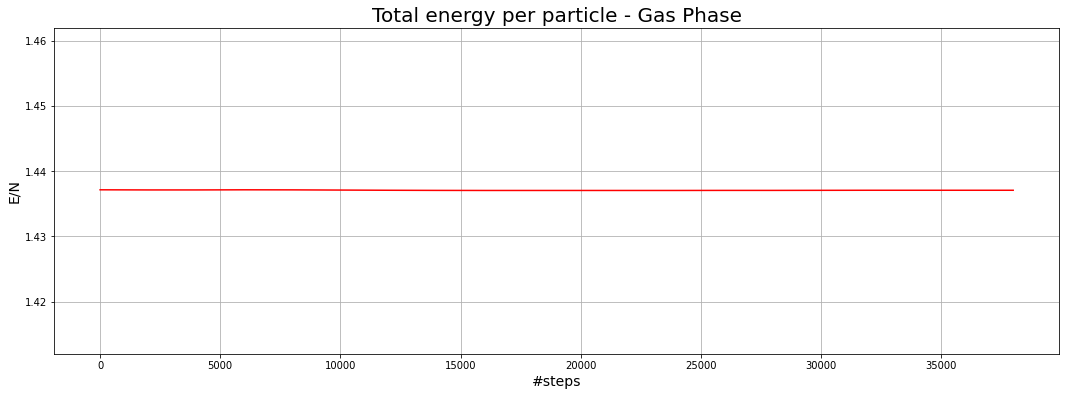

In [29]:
N=20        # Numero di blocchi
L=2000            # Numero di step in ogni blocco
x = np.arange(N)      # [0,1,2,...,N-1]

x*=L # Numero di step = blocco * (Numero di step in ogni blocco)
plt.figure(figsize=(18, 6))
plt.errorbar(x,total_gas[:, 2],yerr=total_gas[:, -1],color='red')
plt.xlabel('#steps', fontsize=14)
plt.ylabel('E/N', fontsize=14)
plt.title('Total energy per particle - Gas Phase', fontsize=20)
plt.ylim(1.412, 1.462)
plt.grid(True)
plt.show()

In [30]:
potential_gas = np.loadtxt("Esercizio_04_2/Gas_Phase/nsl_simulator/NSL_SIMULATOR/OUTPUT/potential_energy.dat", skiprows=1)

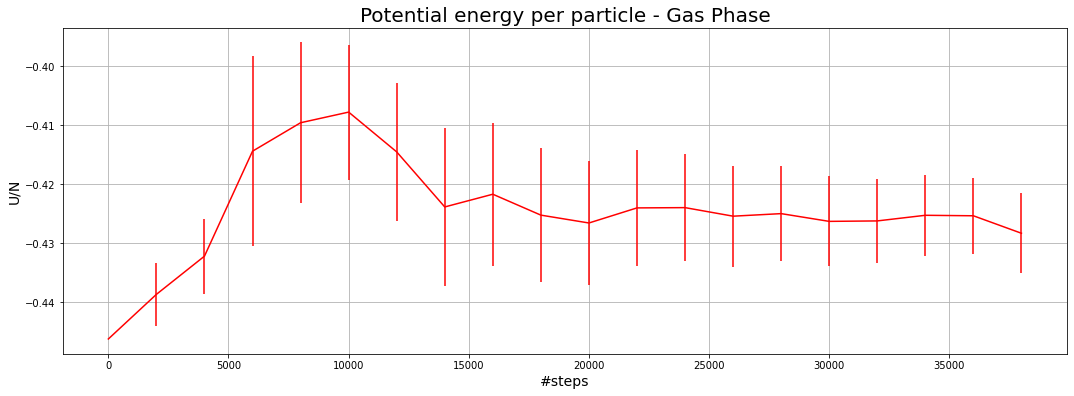

In [31]:
plt.figure(figsize=(18, 6))
plt.errorbar(x,potential_gas[:, 2],yerr=potential_gas[:, -1],color='red')
plt.xlabel('#steps', fontsize=14)
plt.ylabel('U/N', fontsize=14)
plt.title('Potential energy per particle - Gas Phase', fontsize=20)
plt.grid(True)
plt.show()

In [32]:
kinetic_gas = np.loadtxt("Esercizio_04_2/Gas_Phase/nsl_simulator/NSL_SIMULATOR/OUTPUT/kinetic_energy.dat", skiprows=1)

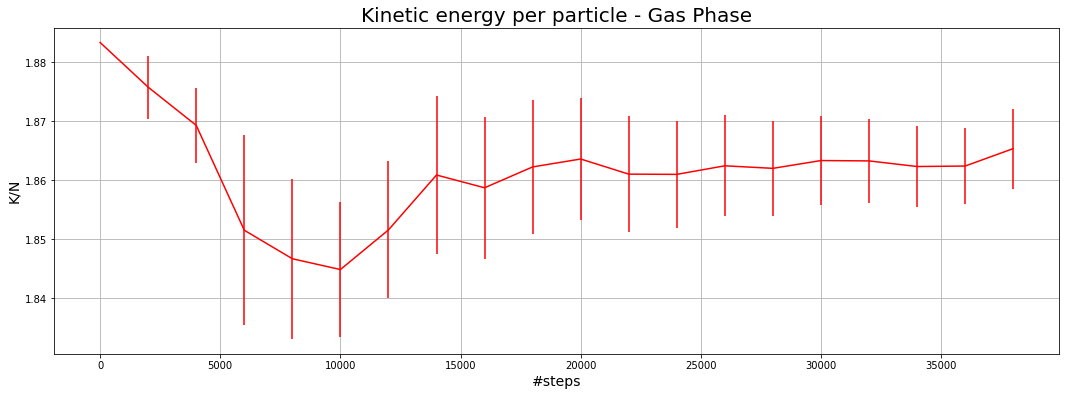

In [33]:
plt.figure(figsize=(18, 6))
plt.errorbar(x,kinetic_gas[:, 2],yerr=kinetic_gas[:, -1],color='red')
plt.xlabel('#steps', fontsize=14)
plt.ylabel('K/N', fontsize=14)
plt.title('Kinetic energy per particle - Gas Phase', fontsize=20)
plt.grid(True)
plt.show()

In [34]:
temp_gas = np.loadtxt("Esercizio_04_2/Gas_Phase/nsl_simulator/NSL_SIMULATOR/OUTPUT/temperature.dat", skiprows=1)

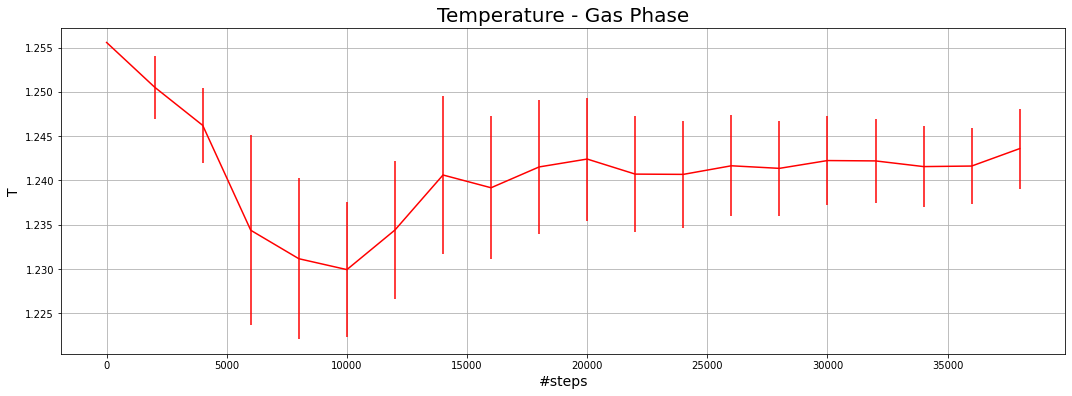

In [35]:
plt.figure(figsize=(18, 6))
plt.errorbar(x,temp_gas[:, 2],yerr=temp_gas[:, -1],color='red')
plt.xlabel('#steps', fontsize=14)
plt.ylabel('T', fontsize=14)
plt.title('Temperature - Gas Phase', fontsize=20)
plt.grid(True)
plt.show()

In [36]:
press_gas = np.loadtxt("Esercizio_04_2/Gas_Phase/nsl_simulator/NSL_SIMULATOR/OUTPUT/pressure.dat", skiprows=1)

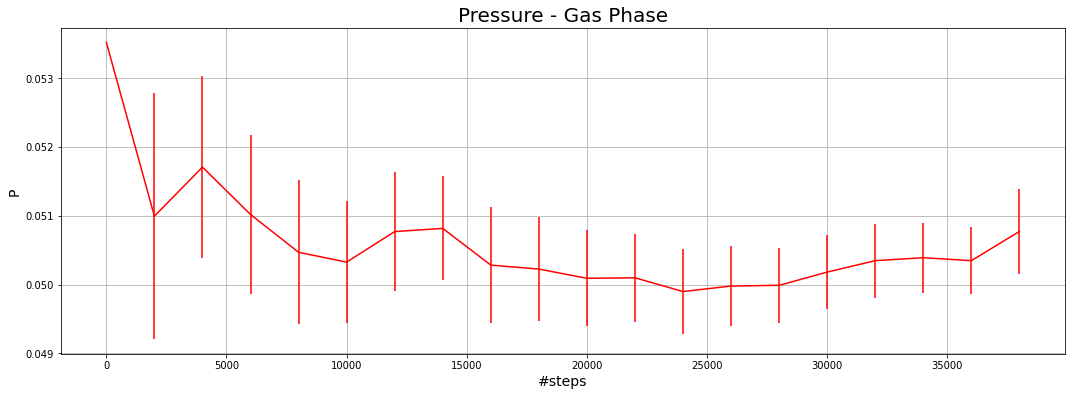

In [37]:
plt.figure(figsize=(18, 6))
plt.errorbar(x,press_gas[:, 2],yerr=press_gas[:, -1],color='red')
plt.xlabel('#steps', fontsize=14)
plt.ylabel('P', fontsize=14)
plt.title('Pressure - Gas Phase', fontsize=20)
plt.grid(True)
plt.show()

Monitorando la temperatura $T$, durante i primi passi temporali delle simulazioni, si osserva che all'inizio, partendo da una perfetta configurazione cristallina, $T$ non conserva il suo valore, come si può osservare nei tre plot di **Equilibrazione** relativi alle tre diverse fasi.

Questo comportamento può essere spiegato considerando che inizialmente le particelle sono posizionate in una disposizione altamente ordinata, che non rappresenta uno stato di equilibrio termodinamico per la temperatura assegnata. Quando la simulazione inizia, le particelle cominciano a muoversi e le velocità si ridistribuiscono per raggiungere un equilibrio dinamico, facendo sì che la temperatura fluttui fino a stabilizzarsi al valore desiderato.

Dai grafici risulta evidente che l'equilibrazione avviene molto più velocemente per la fase <span style="color:green">liquida</span> e per quella <span style="color:blue">solida</span> (intorno ai 2000 passi già c'è convergenza), mentre per quella <span style="color:red">gassosa</span> avviene su tempi quasi quattro volte più lunghi (7000 passi).